In [1]:
!which python3

/Users/karthikmaddukuri/anaconda3/envs/churn-model/bin/python3


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Standard imports
import os
import pickle
import sys
sys.path.append('..')  #To let jupyter notebook to look one folder up

#Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import ( AdaBoostClassifier, GradientBoostingClassifier, 
                              RandomForestClassifier
                             )
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier

#Local imports
from src.localpaths import *
from src.data.make_dataset import load_training_data
from src.models.train_model import *

In [4]:
#Configuration for notebooks

# pd.options.display.max_columns = 100
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Load Featurized Data 

In [5]:
X_train, y_train = load_training_data(final=True)

In [6]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Train Models

In [7]:
models_to_train = [
    DecisionTreeClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier
]

In [8]:
for model_class in models_to_train:
    print(model_class.__name__)
    model = model_class()
    store_model_and_results(model, X_train, y_train)
    print_model_results(model, X_train, y_train)

DecisionTreeClassifier
Fitting model before pickling
saving the pickled model to 1639563322063429632.pkl
Writing model results to existing results csv file
accuracy: 0.72
precision: 0.48
recall: 0.48
f1: 0.48
roc_auc: 0.66
AdaBoostClassifier
Fitting model before pickling
saving the pickled model to 158305255602119168.pkl
Writing model results to existing results csv file


/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.80
precision: 0.65
recall: 0.52
f1: 0.58
roc_auc: 0.84
GradientBoostingClassifier
Fitting model before pickling


/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


saving the pickled model to 1647439854199289600.pkl
Writing model results to existing results csv file
accuracy: 0.81
precision: 0.67
recall: 0.52
f1: 0.58
roc_auc: 0.84
RandomForestClassifier
Fitting model before pickling


../src/models/train_model.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


saving the pickled model to 771445054950758144.pkl
Writing model results to existing results csv file
accuracy: 0.78
precision: 0.61
recall: 0.45
f1: 0.52
roc_auc: 0.81


# Load model results

In [9]:
model_results = load_model_results()

In [10]:
model_results.sort_values(by='roc_auc', ascending=False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
4,1017545180110469376.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
5,1126852098189955072.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
15,382662255737366528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
19,395018859412328704.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
7,2228562323708752128.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
1,2241896888290486528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
24,158305255602119168.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
11,1509884050712260864.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
16,11166360157256192.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.805940,0.671295,0.515827,0.582726,0.844507
2,2129564747755537920.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.805940,0.671295,0.515827,0.582726,0.844507


# GradientBoosting Classifier

In [11]:
model = load_pickled_model('1934686941463014656.pkl')

In [12]:
most_important_features = sorted(zip(X_train.columns, model.feature_importances_), key = lambda x:x[1], reverse=True)
most_important_features[:10]

[('tenure', 0.3191973158397745),
 ('DeviceProtection_Yes', 0.19791966633549282),
 ('MultipleLines_Yes', 0.07174668646146165),
 ('InternetService_Fiber optic', 0.06633528973796865),
 ('StreamingMovies_No internet service', 0.021246361673147404),
 ('MultipleLines_No phone service', 0.01630021640876903),
 ('PaymentMethod_Mailed check', 0.010544960528401153),
 ('PaymentMethod_Electronic check', 0.006981233927907116),
 ('OnlineBackup_Yes', 0.006560146767676456),
 ('SeniorCitizen', 0.00627450728233494)]

# Partial Dependence plots

This shows us the direction of influence of each feature towards the target variable (i.e if influencing to churn or to stay)

/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/inspection/_partial_dependence.py:950: UserWarning: Attempting to set identical bottom == top == 0.0621406659673408 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/inspection/_partial_dependence.py:950: UserWarning: Attempting to set identical bottom == top == -0.7881635403394679 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/inspection/_partial_dependence.py:857: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = 

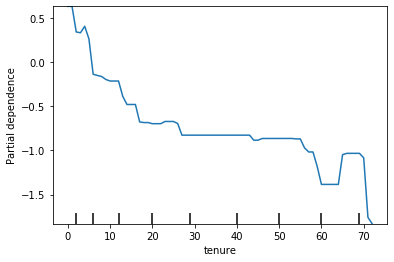

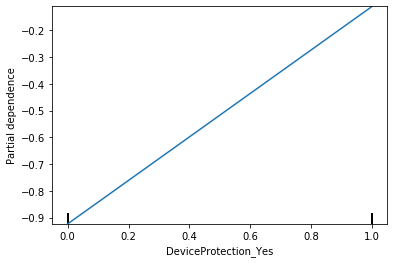

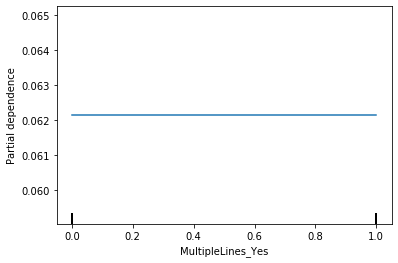

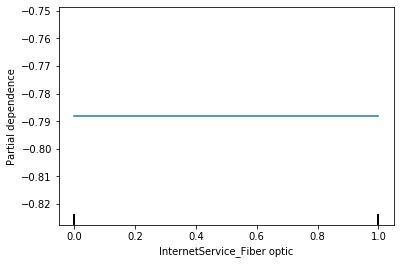

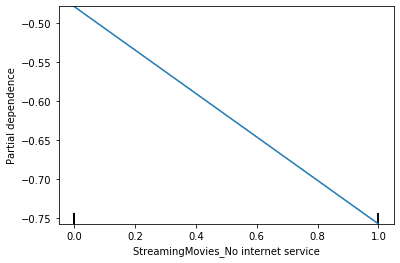

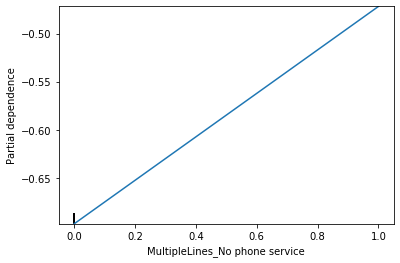

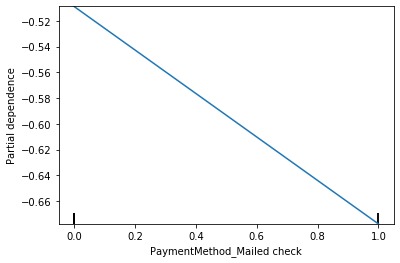

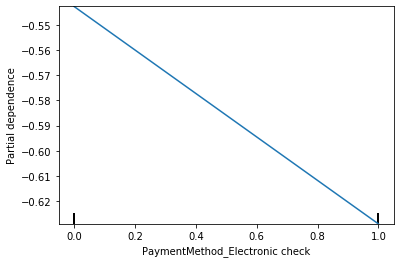

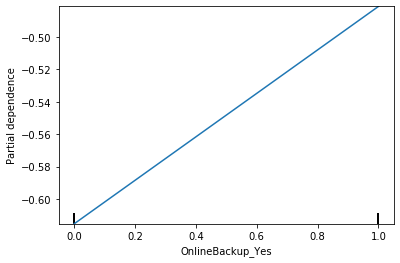

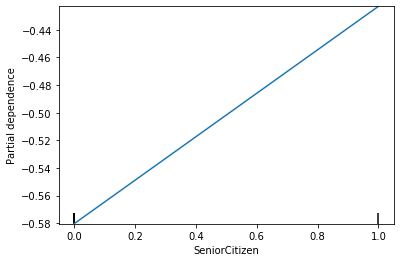

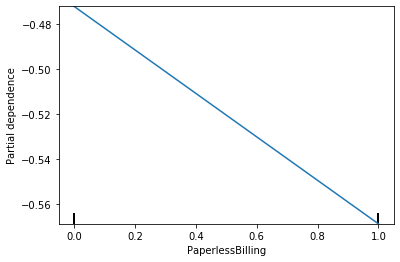

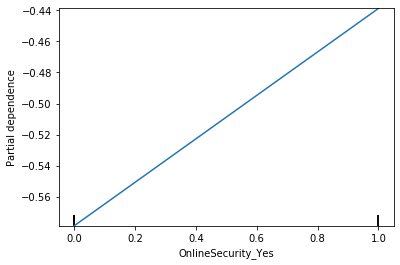

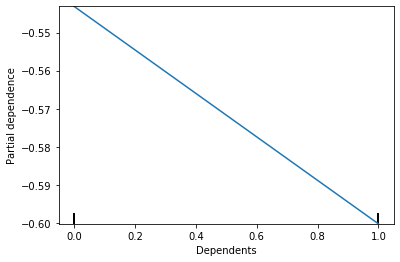

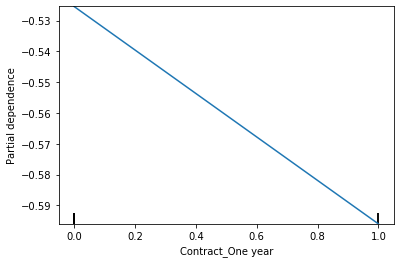

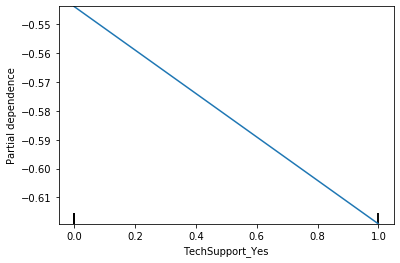

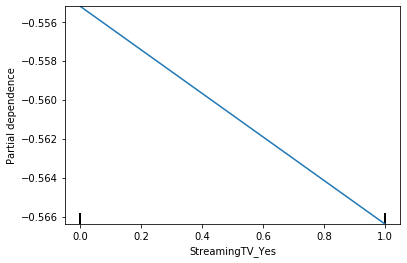

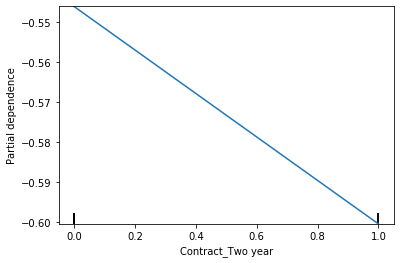

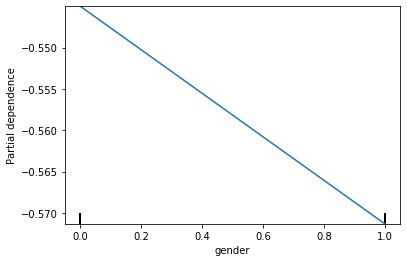

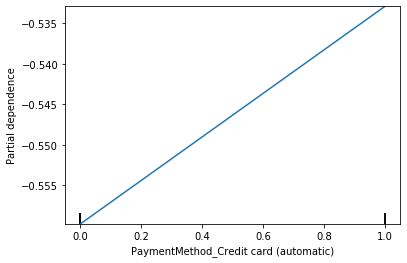

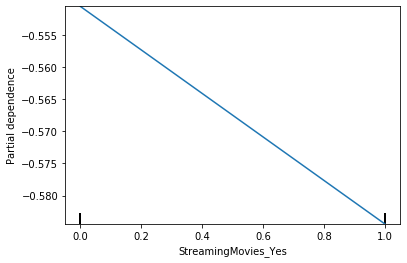

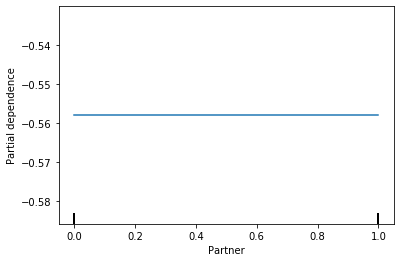

In [13]:
for col, _ in most_important_features[:]:
    plot_partial_dependence(model, X_train, [col])                                       

# Visualize model training
Using **learning curves** to explore overfitting and underfitting 

## Learning Curves

In [14]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train)

/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:145

In [15]:
train_sizes

array([ 422, 1373, 2323, 3274, 4225])

In [16]:
train_scores = np.mean(train_scores, axis = 1)

In [17]:
test_scores = np.mean(test_scores, axis = 1)

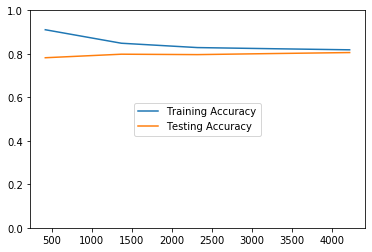

In [18]:
plt.plot(train_sizes, train_scores, label = 'Training Accuracy')
plt.plot(train_sizes, test_scores, label = 'Testing Accuracy')
plt.ylim(0,1)
_ = plt.legend(loc='center')

## Inspecting Overfitting

In [19]:
dt = load_pickled_model('1199677766716801792.pkl')

In [20]:
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)

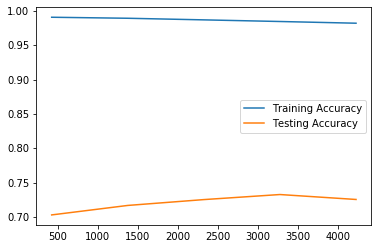

In [21]:
plt.plot(train_sizes, train_scores, label = 'Training Accuracy')
plt.plot(train_sizes, test_scores, label = 'Testing Accuracy')
# plt.ylim(0,1.1)
_ = plt.legend()

# Visualize model performance
Using **ROC curves** to visualize overall classification performance of our models

## ROC Curves

In [22]:
X_train_subset, X_val, y_train_subset, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [23]:
model.fit(X_train_subset, y_train_subset)

/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
y_score = model.predict_proba(X_val)
y_score

array([[0.78276092, 0.21723908],
       [0.87941177, 0.12058823],
       [0.9905395 , 0.0094605 ],
       ...,
       [0.96392603, 0.03607397],
       [0.52753168, 0.47246832],
       [0.53393344, 0.46606656]])

**y_score outputs the probability of 0 class and 1 class, usually we speak about the positive class when talking probability, so we only consider the probability of 1 class.**

In [25]:
y_score = y_score[:,1] 

In [26]:
fpr, tpr, thresholds = roc_curve(y_val, y_score)

### Plot ROC curve for GradientBoosting Classifier

Text(0, 0.5, 'True Positive Rate')

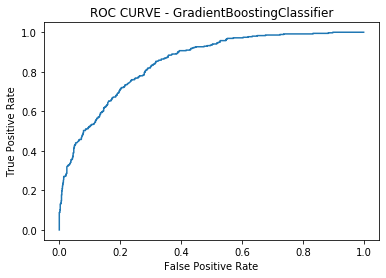

In [27]:
plt.plot(fpr, tpr)
plt.title(f'ROC CURVE - {type(model).__name__}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### ROC Curves for the other models

/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-28-5ec191c86500>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_subset, y_train_subset)


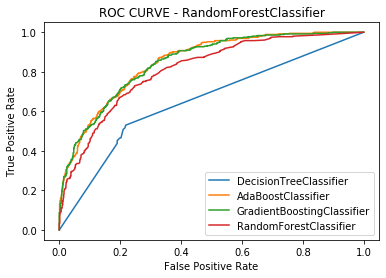

In [28]:
for model_class in models_to_train:
    model = model_class()
    model.fit(X_train_subset, y_train_subset)
    y_score = model.predict_proba(X_val)
    y_score = y_score[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, y_score)
    plt.plot(fpr, tpr,label = f'{type(model).__name__}')
    plt.savefig(REPORTS_DIRECTORY + '/ROC_CURVE.png')
    plt.title(f'ROC CURVE - {type(model).__name__}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

# Training Models after addressing Multicollinearity (dropped high VIF features)

In [29]:
X_train, y_train = load_training_data(final=True)

In [30]:
models_to_train = [
    DecisionTreeClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier
]

In [31]:
for model_class in models_to_train:
    print(model_class.__name__)
    model = model_class()
    store_model_and_results(model, X_train, y_train)
    print_model_results(model, X_train, y_train)

DecisionTreeClassifier
Fitting model before pickling
saving the pickled model to 1977999048657955072.pkl
Writing model results to existing results csv file
accuracy: 0.72
precision: 0.48
recall: 0.48
f1: 0.48
roc_auc: 0.66
AdaBoostClassifier
Fitting model before pickling
saving the pickled model to 2183524338018462976.pkl
Writing model results to existing results csv file


/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.80
precision: 0.65
recall: 0.52
f1: 0.58
roc_auc: 0.84
GradientBoostingClassifier
Fitting model before pickling


/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


saving the pickled model to 649013611415713280.pkl
Writing model results to existing results csv file
accuracy: 0.81
precision: 0.67
recall: 0.52
f1: 0.58
roc_auc: 0.84
RandomForestClassifier
Fitting model before pickling


../src/models/train_model.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


saving the pickled model to 1461724110737210368.pkl
Writing model results to existing results csv file
accuracy: 0.78
precision: 0.61
recall: 0.46
f1: 0.52
roc_auc: 0.81


# Load Model Results

In [32]:
model_results = load_model_results()

In [33]:
model_results.sort_values(by='roc_auc', ascending=False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
4,1017545180110469376.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
5,1126852098189955072.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
15,382662255737366528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
28,2183524338018462976.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
7,2228562323708752128.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
1,2241896888290486528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
19,395018859412328704.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
24,158305255602119168.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
11,1509884050712260864.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
20,484237217246198784.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.805940,0.671295,0.515827,0.582726,0.844507
